# Predicting PPV using PyCaret

## Introduction
In this project, we will use the **PyCaret** library to predict the **PPV** (Price per View) based on the other columns: **Gender**, **Age**, and **Dur** (Duration). We will focus on building a regression model, as **PPV** is a continuous variable. The goal is to create a predictive model that performs well and explains the influence of different features on the **PPV**.

### Dataset Description
The dataset consists of the following columns:
- **Gender**: The gender of the individual (categorical).
- **Age**: The age of the individual (numeric).
- **Dur**: The duration of the session (numeric).
- **PPV**: The target variable representing the price per view (numeric).



In [2]:
pip install pycaret


Note: you may need to restart the kernel to use updated packages.


# Import necessary libraries

In [29]:
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 : Read the dataset

In [53]:
# 1. Load the dataset and the first few rows
df = pd.read_excel('TG_T_CashValues_Rel.xlsx')
df.head()


,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269


In [54]:
#display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  5270 non-null   object 
 1   Age     5270 non-null   int64  
 2   Dur     5270 non-null   int64  
 3   PPV     5270 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 164.8+ KB


### Step 2: Data Preprossicing

1. **Data Cleaning**: We will check for missing values, handle any data inconsistencies, and convert the necessary columns to appropriate data types.

Show column names, datatypes along with the count of non-null values

Check for null values

In [55]:
print(df.isnull().sum())
'''No null value'''

Gender    0
Age       0
Dur       0
PPV       0
dtype: int64


'No null value'

In [56]:
# Check for duplicates
print(df.duplicated().sum())

0


Check for inconsistent values

`For age, dur (duration), and ppv (pay-per-view), they should be non-negative`

In [57]:
df[df['Age'] < 0]

,Gender,Age,Dur,PPV


In [58]:
df[df['Dur'] < 0]

,Gender,Age,Dur,PPV


In [59]:
df[df['PPV'] < 0]

,Gender,Age,Dur,PPV


No inconsistencies

For the Gender attribute, it is a string type, in order to optimize the storage, we can convert it to category type if the unique values number is small

In [60]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

'''As we can see, there are just 2 unique values, so it is good to convert the type to category'''

### Step 3:**Feature Engineering**

Convert categorical columns (such as Gender) into numeric values using encoding techniques.

In [61]:
print("Converting 'Gender' to numerical values {'Male': 0, 'Female': 1}")
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

Converting 'Gender' to numerical values {'Male': 0, 'Female': 1}


In [63]:
# Ensure proper data types for memory optimization
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('int8')
df['PPV'] = df['PPV'].astype('float32')
df['Dur']=df['Dur'].astype('int8')

In [64]:
# Display updated data types
df.dtypes

Gender    category
Age           int8
Dur           int8
PPV        float32
dtype: object

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  5270 non-null   category
 1   Age     5270 non-null   int8    
 2   Dur     5270 non-null   int8    
 3   PPV     5270 non-null   float32 
dtypes: category(1), float32(1), int8(2)
memory usage: 36.3 KB


From 164.8+ KB to 36.3 KB, that's cool!

less memory and better data

### Step 4: Exploratory Data Analysis

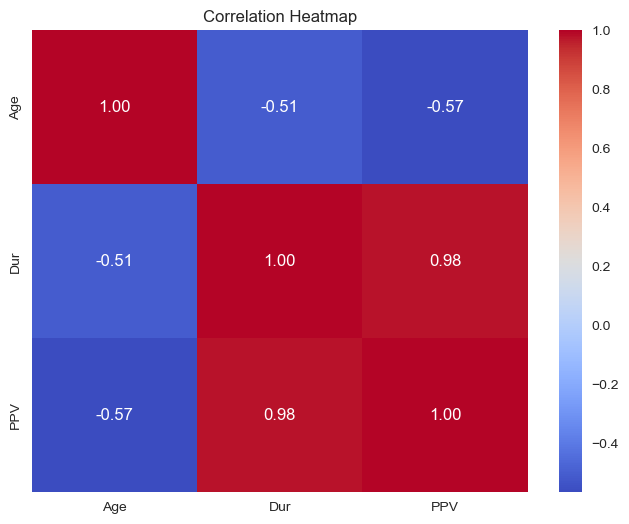

In [66]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


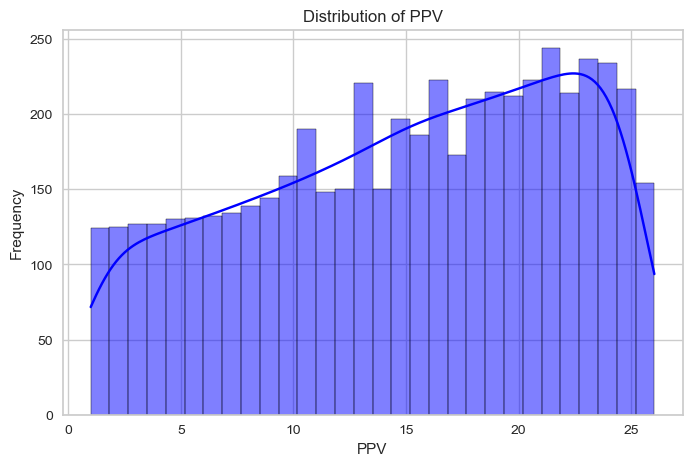

In [67]:
# Distribution of target variable (PPV)
plt.figure(figsize=(8, 5))
sns.histplot(df['PPV'], kde=True, bins=30, color='blue')
plt.title("Distribution of PPV")
plt.xlabel("PPV")
plt.ylabel("Frequency")
plt.show()

### Step 3: Model Selection and Training

We will use PyCaret's regression module to automatically compare multiple machine learning models and select the best-performing one.

We will evaluate models using the following metrics:
- **RMSE (Root Mean Squared Error)**
- **MAE (Mean Absolute Error)**

These metrics will allow us to determine the model that best fits the data and provides accurate predictions.



In [68]:
print("Initializing PyCaret setup...")
# setup PyCaret 
exp = setup(df, target='PPV', categorical_features=['Gender'], fold=10)

Initializing PyCaret setup...


,Description,Value
0,Session id,6925
1,Target,PPV
2,Target type,Regression
3,Original data shape,"(5270, 4)"
4,Transformed data shape,"(5270, 4)"
5,Transformed train set shape,"(3688, 4)"
6,Transformed test set shape,"(1582, 4)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


In [69]:
#Compare models and select the best one
print("Comparing models...")
best_model = compare_models()

Comparing models...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0096,0.0007,0.0263,1.0000,0.0020,0.0007,0.1870
rf,Random Forest Regressor,0.0357,0.0039,0.0625,0.9999,0.0049,0.0028,0.2250
lightgbm,Light Gradient Boosting Machine,0.0341,0.0044,0.0659,0.9999,0.0047,0.0027,0.1650
dt,Decision Tree Regressor,0.0529,0.0099,0.0991,0.9998,0.0068,0.0037,0.0250
gbr,Gradient Boosting Regressor,0.0810,0.0179,0.1328,0.9996,0.0117,0.0082,0.0810
knn,K Neighbors Regressor,0.1736,0.0579,0.2402,0.9988,0.0389,0.0262,0.0280
ada,AdaBoost Regressor,0.5505,0.4333,0.6578,0.9910,0.0933,0.0744,0.0900
lar,Least Angle Regression,1.0852,1.7087,1.3066,0.9647,0.1900,0.1762,0.0220
br,Bayesian Ridge,1.0853,1.7087,1.3066,0.9647,0.1900,0.1762,0.0200
ridge,Ridge Regression,1.0852,1.7087,1.3066,0.9647,0.1900,0.1762,0.0180


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [70]:
# Display the best model
print("Best model:", best_model)

Best model: ExtraTreesRegressor(n_jobs=-1, random_state=6925)


In [74]:
# Finalize the best model
final_model=finalize_model(best_model)

### Step 6: Evaluate Model
After training the model, we will summarize our findings, evaluate the model’s performance, and justify the choice of the final model.


Feature importance analysis...


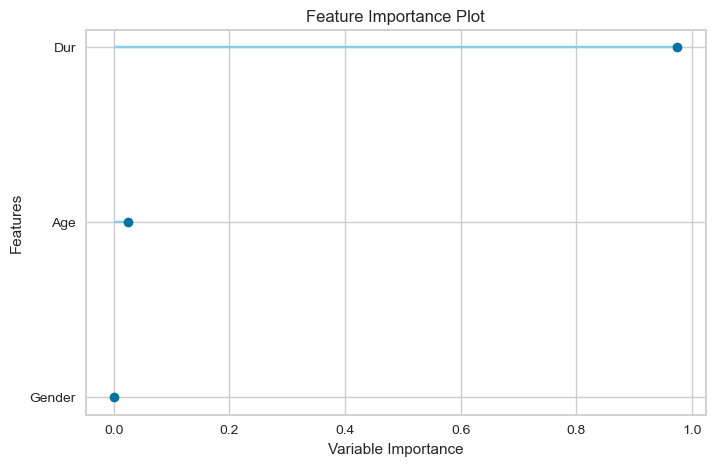

In [75]:
# Feature importance
print("Feature importance analysis...")
plot_model(final_model, plot='feature')

I will not ignore the gender column because although it is of little importance, it affects the performance of the model better

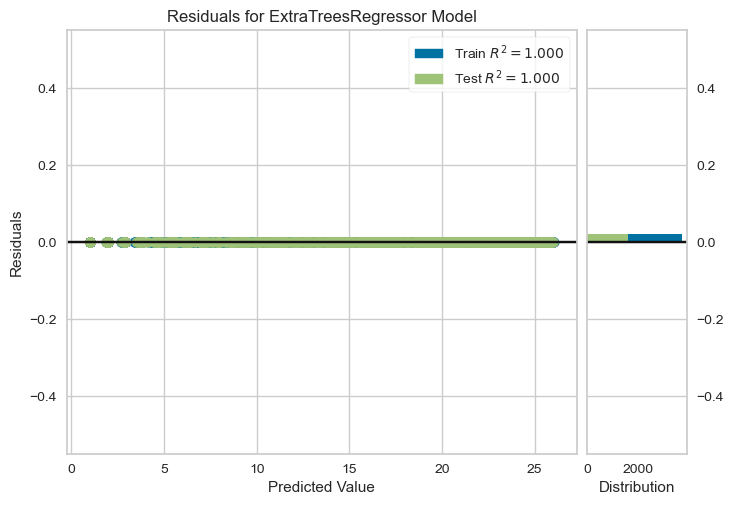

In [76]:
# Residuals plot
plot_model(final_model, plot='residuals')


In [77]:
# Model performance
performance = pull()
print("Model performance:")
print(performance)

Model performance:
                                    Model     MAE      MSE    RMSE      R2  \
et                  Extra Trees Regressor  0.0096   0.0007  0.0263  1.0000   
rf                Random Forest Regressor  0.0357   0.0039  0.0625  0.9999   
lightgbm  Light Gradient Boosting Machine  0.0341   0.0044  0.0659  0.9999   
dt                Decision Tree Regressor  0.0529   0.0099  0.0991  0.9998   
gbr           Gradient Boosting Regressor  0.0810   0.0179  0.1328  0.9996   
knn                 K Neighbors Regressor  0.1736   0.0579  0.2402  0.9988   
ada                    AdaBoost Regressor  0.5505   0.4333  0.6578  0.9910   
lar                Least Angle Regression  1.0852   1.7087  1.3066  0.9647   
br                         Bayesian Ridge  1.0853   1.7087  1.3066  0.9647   
ridge                    Ridge Regression  1.0852   1.7087  1.3066  0.9647   
lr                      Linear Regression  1.0852   1.7087  1.3066  0.9647   
lasso                    Lasso Regression  1.

In [80]:
# 7. Prediction on new data (if applicable)
new_data = pd.DataFrame({
    'Gender': [0, 1],  # Male, Female
    'Age': [30, 25],
    'Dur':[20,40]
})

print("New data for prediction:")
print(new_data)

predictions = predict_model(final_model, data=new_data)
print("Predictions:")
print(predictions)

New data for prediction:
   Gender  Age  Dur
0       0   30   20
1       1   25   40


Predictions:
   Gender  Age  Dur  prediction_label
0       0   30   20         15.093797
1       1   25   40         23.192934


In [79]:
# Save the model for future use
save_model(final_model, 'best_regression_model')
print("Model saved as 'best_regression_model.pkl'")


Transformation Pipeline and Model Successfully Saved
Model saved as 'best_regression_model.pkl'
